## Example notebook to read and plot ERA5 output

This notebook reads and plots wintertime (June-Sep), mean sea level pressure (MSLP) from the Maud Rise for years 2010-2019. MSLP was sourced from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview. The Maud Rise region is taken to be area bounded by $0^{\circ}-5^{\circ}$E and $63^{\circ}-68^{\circ}$S; this is similar to the definition used by Campbell et al. (2019). Data were selected at 6 hourly time stamps (00:00, 06:00, 12:00, 18:00) and saved as netCDF. This data subset is roughly 4 MB. 

If you don't have python, I would recommend getting the Anaconda distribution: https://www.anaconda.com/distribution/. The Anaconda distribution comes with most of the numerical and scientific modules pre-installed. It also supports jupyter notebooks (such as this one). You may need to download additional modules, like xarray, but that's fairly straightforward. 

In [1]:
# import necessary python modules
import numpy as np # for numerical calculations
import matplotlib.pylab as plt # for plotting
import xarray as xr # for numerical calculations and reading netCDF data
import os  # general purpose module for interacting with your operating system 
#from datetime import datetime # to handle datetime objects

data_dir = '/Users/ewilson2011/Documents/Southern_Ocean/data/ERA5/for_camila/' 

Let's take a look at the data using xarray...

In [2]:
fname = 'mslp_MR_2010-2019.nc'
fpath = os.path.join(data_dir, fname)
ds = xr.open_dataset(fpath)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 21, time: 4880)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 -63.0 -63.25 -63.5 ... -67.5 -67.75 -68.0
  * time       (time) datetime64[ns] 2010-06-01 ... 2019-09-30T18:00:00
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-04-21 16:21:46 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


The variable `ds` is an *xarray dataset*, which is a container variable for storing data. An xarray dataset is similar to a python dictionary or matlab struct, but has the added benefit of carrying information about the data that it holds (i.e. metadata). xarray is also useful for reading and writing netCDF data. 

The command `print(ds)` provides a summary of the file's metadata. We see that the dataset contains one variable `msl`, which has three dimensions: `latitude`, `longitude`, and `time`.

In [3]:
print(ds['msl'])

<xarray.DataArray 'msl' (time: 4880, latitude: 21, longitude: 21)>
[2152080 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 -63.0 -63.25 -63.5 ... -67.5 -67.75 -68.0
  * time       (time) datetime64[ns] 2010-06-01 ... 2019-09-30T18:00:00
Attributes:
    units:          Pa
    long_name:      Mean sea level pressure
    standard_name:  air_pressure_at_mean_sea_level


Taking a closer look at the `msl` variable, we see that it is in fact mean sea level pressure (which we already know) and has units of Pascals. 

Next, we take a spatial average and plot the result as a time series. 

In [7]:
ds_xymean = ds.mean(dim=['latitude', 'longitude'])
print(ds_xymean)

<xarray.Dataset>
Dimensions:  (time: 4880)
Coordinates:
  * time     (time) datetime64[ns] 2010-06-01 ... 2019-09-30T18:00:00
Data variables:
    msl      (time) float32 99327.22 98902.35 98413.67 ... 99950.72 99621.37


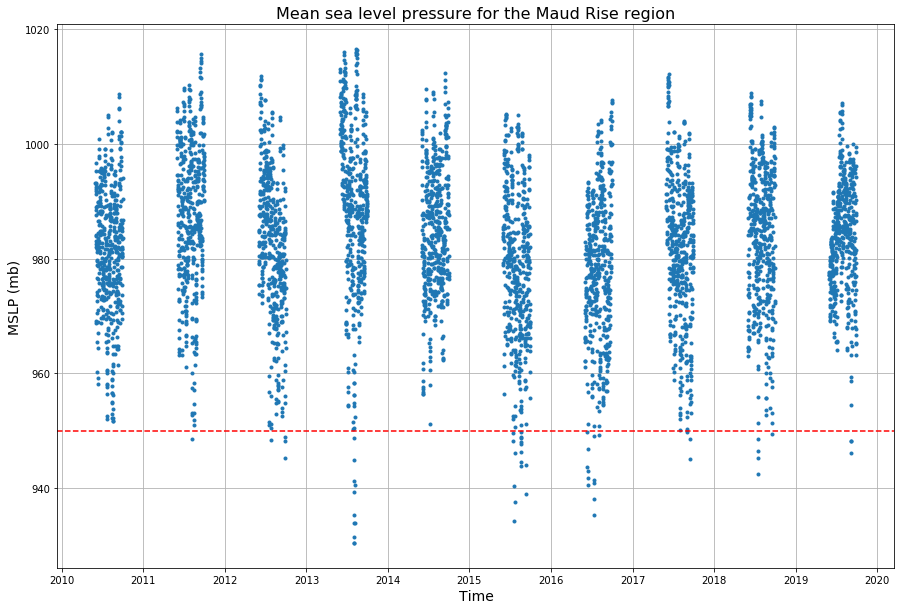

In [9]:
fz = 14 # define fontsize

plt.figure(figsize=(15, 10)) # default figsize is kinda small
plt.plot(ds_xymean['time'], ds_xymean['msl']/100, '.') # divide by 100 to get mb
plt.grid(True)
plt.ylabel("MSLP (mb)", fontsize=fz)
plt.xlabel("Time", fontsize=fz)
plt.title("Mean sea level pressure for the Maud Rise region", fontsize=fz+2)
plt.axhline(950, linestyle='--', color='r') # add storm threshold used by Campbell et al. (2019)

This plot shows six-hourly, point measurements of sea level pressure between 2010-2019. As stated before this is only for austral winter, which we define as June-September. The horizontal dashed line delineates periods that are above or below 950 mb, which was used by Campbell et al. (2019) to define storm events. This 950 mb threshold is somewhat arbitrary but appears to capture extreme events quite well. 

## To-do list for this week: 

1. Download and install Python from Anaconda (https://www.anaconda.com/distribution/). 
    + Also, visit the [Jupyter Notebook docs](https://jupyter-notebook.readthedocs.io/en/stable/) to learn how to read and create Notebooks like this one.
    
    
2. Install xarray and quickly skim through the getting started page: http://xarray.pydata.org/en/stable/.


3. Once you manage to get this Notebook running on your own, visit the ERA5 page to download additional data for the Maud Rise region. To keep the file size manageable, I would suggest sticking with the [$0^{\circ}$E - $5^{\circ}$E, $63^{\circ}$S - $68^{\circ}$S] box and six hourly time intervals. Some suggestions:

    + **Repeat the above analysis using near-surface wind speed as the storm metric and see how it compares with MSLP.** To compute wind speed, you will need to download the 10m u- and v-components of the wind vector (i.e. the east-west and north-south components). 
    
    + **Use a standard-deviation threshold to identify extreme storm events (for e.g. periods with measurements 2 standard deviations above/below the mean)**. This would be a slightly more objective method of identifying extreme events.
    
    + **Download other variables such as 2m temperature and total precipitation and see how they vary with respect to storm events**.
    
    + If you breeze through all of this, you can take a stab at computing the total number of storm days in each winter season.